In [31]:
from pandas_datareader import data,wb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
%matplotlib inline

<h1>Data</h1>
<p>We need to get data using pandas datareader. We will get stock information for the following banks between year 2006 and 2016:</p>
<ul>
    <li>Bank of America</li>
    <li>CitiGroup</li>
    <li>Goldman Sachs</li>
    <li>JPMorgan Chase</li>
    <li>Morgan Stanley</li>
    <li>Wells Fargo</li>
</ul>


In [2]:
start = datetime(2006,1,1)
end= datetime(2016,1,1)

In [5]:
BAC = data.get_data_yahoo("BAC",start=start,end=end)
C = data.get_data_yahoo("C",start=start,end=end)
GS = data.get_data_yahoo("GS",start=start,end=end)
JPM = data.get_data_yahoo("JPM",start=start,end=end)
MS = data.get_data_yahoo("MS",start=start,end=end)
WFC = data.get_data_yahoo("WFC",start=start,end=end)

In [6]:
tickers = ["BAC","C","GS","JPM","MS","WFC"]

In [7]:
bank_stocks = pd.concat([BAC,C,GS,JPM,MS,WFC],axis=1,keys=tickers)

In [8]:
bank_stocks.columns.names = ['Bank Tickers','Stock Info']

In [9]:
bank_stocks.head()

Bank Tickers        BAC                                               \
Stock Info         High        Low       Open      Close      Volume   
Date                                                                   
2006-01-03    47.180000  46.150002  46.919998  47.080002  16296700.0   
2006-01-04    47.240002  46.450001  47.000000  46.580002  17757900.0   
2006-01-05    46.830002  46.320000  46.580002  46.639999  14970700.0   
2006-01-06    46.910000  46.349998  46.799999  46.570000  12599800.0   
2006-01-09    46.970001  46.360001  46.720001  46.599998  15619400.0   

Bank Tickers                      C                                      ...  \
Stock Info    Adj Close        High         Low        Open       Close  ...   
Date                                                                     ...   
2006-01-03    34.596096  493.799988  481.100006  490.000000  492.899994  ...   
2006-01-04    34.228691  491.000000  483.500000  488.600006  483.799988  ...   
2006-01-05    34.272778  487.799988  484.000000  484.399994  486.200012  ...   
2006-01-06    34.221321  489.000000  482.000000  488.799988  486.200012  ...   
2006-01-09    34.243366  487.399994  483.000000  486.000000  483.899994  ...   

Bank Tickers         MS                                         WFC  \
Stock Info         Open      Close     Volume  Adj Close       High   
Date                                                                  
2006-01-03    57.169998  58.310001  5377000.0  36.786667  31.975000   
2006-01-04    58.700001  58.349998  7977800.0  36.811905  31.820000   
2006-01-05    58.549999  58.509998  5778000.0  36.912865  31.555000   
2006-01-06    58.770000  58.570000  6889800.0  36.950710  31.775000   
2006-01-09    58.630001  59.189999  4144500.0  37.341850  31.825001   

Bank Tickers                                                          
Stock Info          Low       Open      Close      Volume  Adj Close  
Date                                                                  
2006-01-03    31.195000  31.600000  31.900000  11016400.0  20.658106  
2006-01-04    31.365000  31.799999  31.530001  10870000.0  20.418499  
2006-01-05    31.309999  31.500000  31.495001  10158000.0  20.395836  
2006-01-06    31.385000  31.580000  31.680000   8403800.0  20.515644  
2006-01-09    31.555000  31.674999  31.674999   5619600.0  20.512400  

[5 rows x 36 columns]

In [13]:
bank_stocks.xs(key='Close',axis=1,level=1).mean()

Bank Tickers
BAC     22.174660
C      145.388713
GS     158.481482
JPM     45.985546
MS      36.006198
WFC     35.598323
dtype: float64

In [17]:
bank_stocks.xs(key='Close',axis=1,level=1).idxmin()

Bank Tickers
BAC   2009-03-06
C     2009-03-05
GS    2008-11-20
JPM   2009-03-09
MS    2008-11-20
WFC   2009-03-05
dtype: datetime64[ns]

In [18]:
bank_stocks.xs(key='Close',axis=1,level=1).idxmax()

Bank Tickers
BAC   2006-11-16
C     2006-12-27
GS    2007-10-31
JPM   2015-07-22
MS    2007-06-14
WFC   2015-07-22
dtype: datetime64[ns]

<p>As observed from above prices were maximum around 2006 for most banks and started declining reaching a min point in 2009</p>

In [20]:
returns = pd.DataFrame()

In [23]:
for tick in tickers:
    returns[tick+"returns"] = bank_stocks[tick]['Close'].pct_change()

In [27]:
returns.head()

,BACreturns,Creturns,GSreturns,JPMreturns,MSreturns,WFCreturns
Date,,,,,,
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158
2006-01-10,-0.008369,0.003100,0.012578,0.001475,0.000507,-0.000789


<h4> Now lets analyze which stock would have been most profitable and which one most dangerous to invest in 2007 </h4>

In [53]:
df = bank_stocks.loc['2007-01-01':'2009-12-31'].xs(key='Close',axis=1,level=1)

In [54]:
df.head()

Bank Tickers,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2007-01-03,53.330002,552.500000,200.720001,48.070000,81.620003,35.740002
2007-01-04,53.669998,550.599976,198.850006,48.189999,81.910004,35.799999
2007-01-05,53.240002,547.700012,199.050003,47.790001,80.860001,35.599998
2007-01-08,53.450001,550.500000,203.729996,47.950001,81.349998,35.500000
2007-01-09,53.500000,545.700012,204.080002,47.750000,81.160004,35.590000


In [55]:
import cufflinks as cf
cf.go_offline()

In [56]:
df.iplot(kind='line')

<ol>
    <li>The most dangerous stock</li>
    <p> Citi group as it saw the greatest deep from 2007-2009</p>
    <li>The most profitable(safe) stock</li>
    <p>Wells Fargo as the stock price remained nearly constant even during recession</p>
</ol>

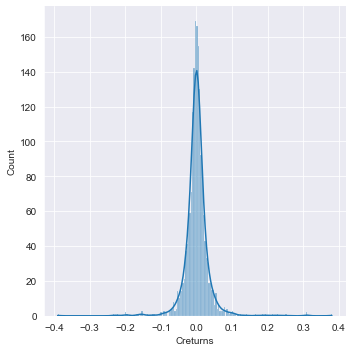

In [63]:
sns.displot(returns.loc['2009-01-01':'2015-12-31']['Creturns'],kde=True,bins=200)

<AxesSubplot:xlabel='Bank Tickers', ylabel='Bank Tickers'>

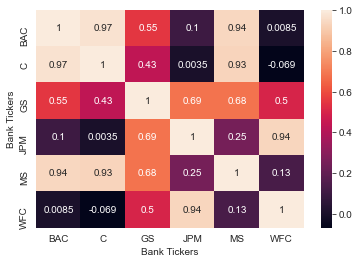

In [65]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level=1).corr(),annot=True)